

# Project: Investigate TMDb movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I am going to take TMDb movie dataset and investigate it. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Which makes it a great data to explorer and investigate and create some knowledge about movies trend out of it. 
Since the data includes movies from more than 50 years ago, the first question I am going to make is: 

   1.	Which year has the most number of successful movies?
   
And to make an analysis about the movies released in each year, I am going to ask:

   2.	How many movies released for each year?
   
So let's go and see the answers of these questions! 


In [5]:
#importing needed packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling 

In this step, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.


In [6]:
#importing the dataset
dataset = pd.read_csv("tmdb-movies.csv")

I uploaded the dataset of movies, now lets take a look at the data:


In [7]:
#lets take a look at the head of the data
dataset.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [8]:
#to see the shape of data and how many columns and rows it has 
dataset.shape

(10866, 21)

So we can see that the data has 21 columns and 10866 rows.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|)
characters.

There are some odd characters in the ‘cast’ column. but no need to worry about cleaning them since I wont use this column. 

The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

Vote count and average refer to the users vote in the TMDb website.



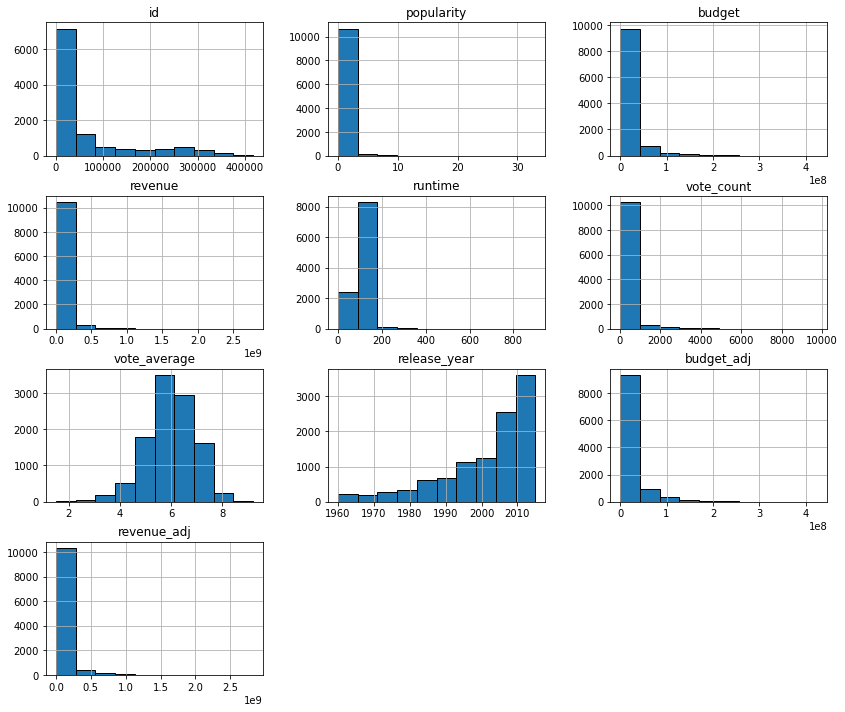

In [87]:
#histogram for the data
dataset.hist(figsize = (14,12), edgecolor = 'black');

In [9]:
#summary statistics
dataset.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We can notice that there some columns have a minimum value of zero. On some columns, a value of zero does not make sense and indicates an invalid or missing data. Such as budget and revenues. 
But since I am mainly going to use revenue column in this project I am going to handle the missing data in this column only

We can count the number of messing data by marking all of the values in the desired column that have zero values as True. Then count the number of true values on it.

In [16]:
# count the number of missing values for each column
missing_data = (dataset['revenue'] == 0).sum()
# report the results
print(missing_data)

6016


To solve this problem, I am going to impute missing values in revenues with mean.

In [144]:
dataset['revenue'] = dataset['revenue'].replace(0, dataset['revenue'].mean())

Let's check to see if the messing data of zeros in revenue have been imputed.

In [145]:
dataset.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,6.187164e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.110204e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,3.982332e+07,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,3.982332e+07,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,3.982332e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Indeed, the missing data of zeros in revenue have been impute with mean and now the minimum of revenue is no longer zero.

In [146]:
#general info about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           10866 non-null  int64  
 1   imdb_id                      10856 non-null  object 
 2   popularity                   10866 non-null  float64
 3   budget                       10866 non-null  int64  
 4   revenue                      10866 non-null  float64
 5   original_title               10866 non-null  object 
 6   cast                         10790 non-null  object 
 7   homepage                     2936 non-null   object 
 8   director                     10822 non-null  object 
 9   tagline                      8042 non-null   object 
 10  keywords                     9373 non-null   object 
 11  overview                     10862 non-null  object 
 12  runtime                      10866 non-null  int64  
 13  genres          

homepage, tagline, keywords and production_companies columns contain the most null values but since I dont need them in my analysis anyway I wont bother cleaning them.

Let's take a look ar the visualization of the null data using missingno tool that provide the ability to visualize null values in a dataset.

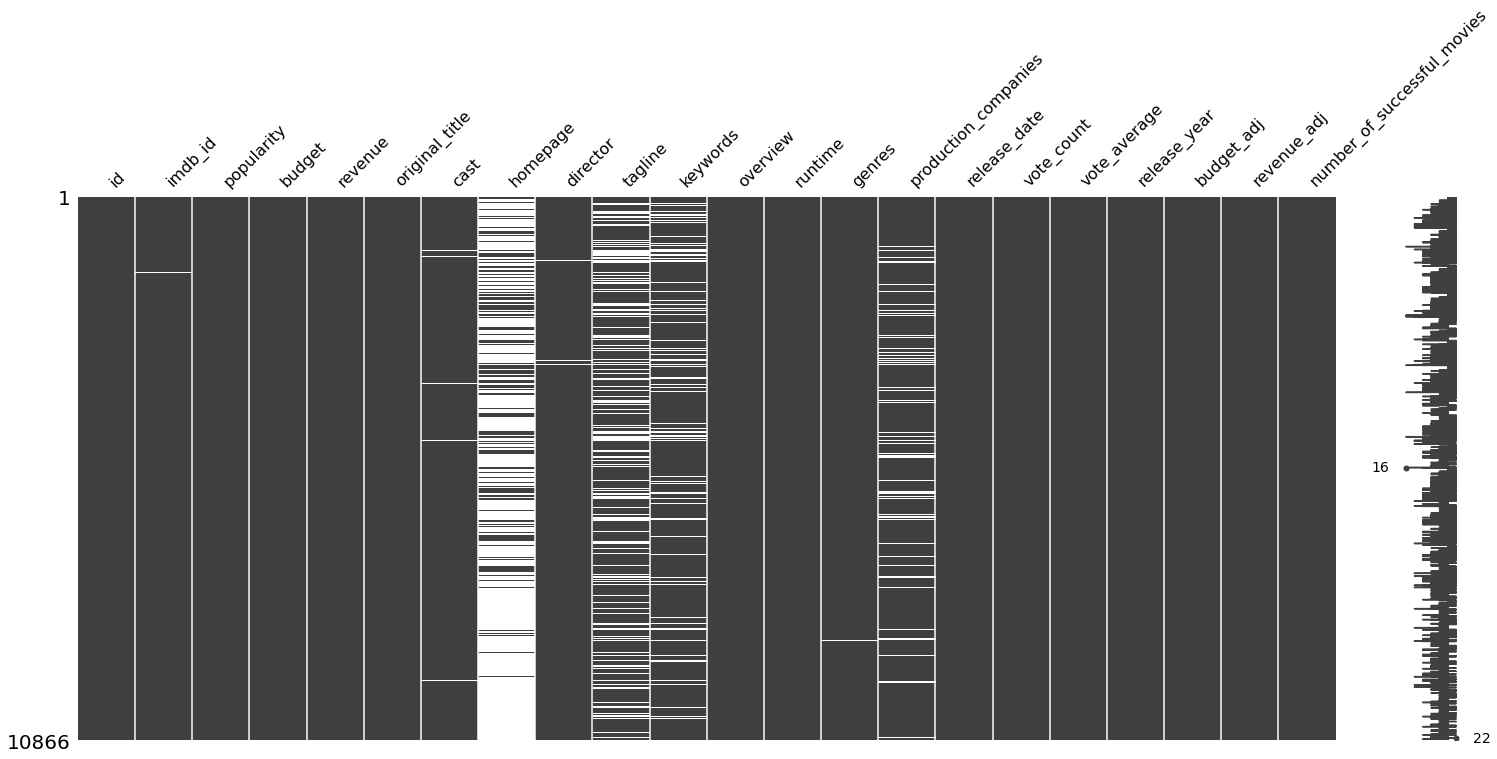

In [147]:
msno.matrix(dataset);

Indeed homepage column got the most count of null data, followed by tagline. 
Not to get concerned about them anyway since they are not needed.


### Removing Unneeded Columns 

So as we saw above, most of the columns presented in this dataset are not needed for this analysis so I am going to remove them.

"imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies" are the columns that I am going to get rid of. 


In [141]:
dataset.drop(['imdb_id', 'cast', 'keywords', 'homepage', 'director', 'tagline', 'overview', 'genres', 'production_companies'], axis = 1, inplace = True )

In [143]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   runtime         10866 non-null  int64  
 6   release_date    10866 non-null  object 
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   release_year    10866 non-null  int64  
 10  budget_adj      10866 non-null  float64
 11  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1018.8+ KB


The have been removed.

<a id='eda'></a>
## Exploratory Data Analysis

Now I am going to compute statistics and create visualizations to find the answers for the questions I have made above.


### Research Question 1:  Which year has the most number of successful movies?

To answer this, I am going to take the mean of the revenues and see which year has the largest number of movies that grossed more than the mean of the total revenue of the data set.

In [148]:
#taking the mean and calculating the number of movies that grossed more than the mean for each year
dataset['number_of_successful_movies'] = dataset.revenue > dataset.groupby(['release_year']).revenue.transform('mean')
dataset.groupby('release_year', as_index=False).number_of_successful_movies.sum().sort_values('number_of_successful_movies',ascending=False)


,release_year,number_of_successful_movies
51,2011,90
53,2013,87
54,2014,82
48,2008,79
50,2010,77
47,2007,77
52,2012,74
55,2015,73
46,2006,73
45,2005,73


So the year of 2011 has the most successful movies released within it by 90 movie. Followed by 2014 with 87 movie. 
We can notice that all the years from 2000 to 2015 are occupying almost all the top spots. 
Could that be because they generally have more movies released within them which means higher chance to get successful movies within it?
Lets find that in the answer of the next question.

### Multiple-Variable (2D) Explorations

let's see if there is relationship between movie's popularity and revenue. Whether if movies with higher popularity have higher revenue or not.
Taking popularity as an independent variable and revenue as a dependent variable.

I will standardize each column for popularity and revenue.

In [150]:
def standard(sd):
    return (sd - sd.mean())/sd.std(ddof=0)

revenueData = dataset[["popularity","revenue"]]

Lt's see the trend of revenues over the years:

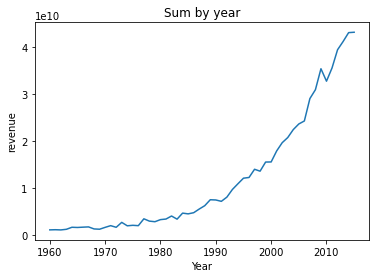

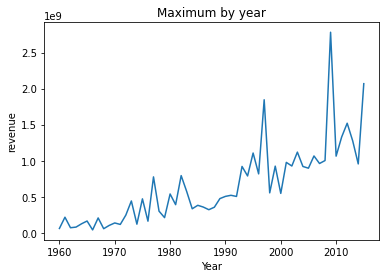

In [155]:
revenueYearly = dataset[["release_year","revenue"]].groupby("release_year").agg([np.sum,np.max])
revenueYearly.columns = ["sum", "max"]

if True:
    plt.title('Sum by year')
    plt.xlabel('Year')
    plt.ylabel('revenue')
    plt.plot(revenueYearly.index, revenueYearly["sum"])
    plt.show()
    plt.title('Maximum by year')
    plt.xlabel('Year')
    plt.ylabel('revenue')
    plt.plot(revenueYearly.index, revenueYearly["max"])
    plt.show()

We can see that revenues are increasing over time with some peaks over the place.

Now let's see the correlation between release year and revenue:

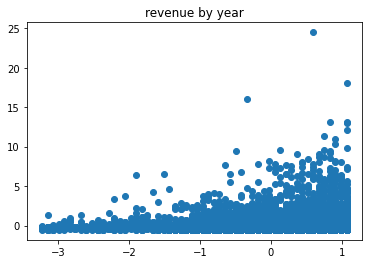

In [131]:
#calculate relationship between release year and revenue
YearRevenue = dataset[["release_year","revenue"]]
standardizeData = YearRevenue.apply(standard)

plt.scatter(standardizeData["release_year"], standardizeData["revenue"])
plt.title("revenue by year")
plt.show()

In [132]:
#Calculating correlation
correlation = (standardizeData["release_year"] * standardizeData["revenue"]).mean()
correlation

0.0651337752411407

Well, since the number is close to zero, we can say that there is weak correlation between the year that movies are released in and how much revenues it going to make.

### Research Question 2: How many movies released for each year?

To answer this, I will use value_counts() function to count the number of movies released per year. 
But first of all, let's see the Density plot of movies released for each year to get a general idea of the trend. 

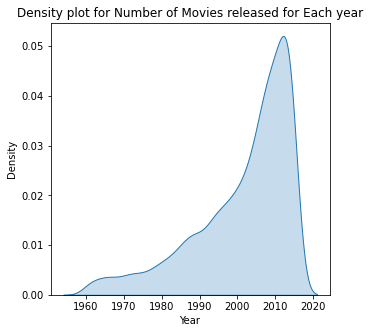

In [134]:
plt.figure(figsize = (5,5))
sns.kdeplot(dataset['release_year'] , fill = True)
plt.title('Density plot for Number of Movies released for Each year')
plt.xlabel('Year')
plt.ylabel('Density');
plt.show()

As we can see above, the number of movies released for every year is increasing with time.

Now let's count the number of movies released for each year.

In [135]:
#counting number of movies realsed per year
dataset['release_year'].value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1973     55
1971     55
1976     47
1974     47
1966     46
1975     44
1964     42
1970     41
1972     40
1967     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

So the year of 2014 got the most number of movies released within it which could explain why it was also among the top years with most number of successful movies released within it!
And as what we suspected above, indeed the years of 2000-2015 got more movies released within them than the previous years which give them higher chance to get more successful movies.

<a id='conclusions'></a>
## Conclusions

I analyzed the TMDb movie dataset and answered the two questions I made above. Which were finding the number of successful movies released for each year and how many movies released in each year. After answering them I have noticed that the higher number of movies get released each year, the higher the chance is to have more successful movies. Yet this is only a something I have observed after investigating this data set which could be wrong as well. Since I had many limitations while analyzing this data, such as taking a simple measurement to determine what would classify a movie as successful, while indeed higher revenues would indicate a successful movie, they are not the full story and many movies success does not rely on revenues alone.


* References:

geeksforgeeks.org

